# Project 3 - Personal Loan Campaign - Christy Halim

## Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

## Objective
You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

## Key questions to be answered
1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more.

## Dataset
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?


## Setting Up

### Import the necessary packages

In [1]:
# this will help in making the Python code more structured automatically
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)


<IPython.core.display.Javascript object>

## Initial Checks

### Read-in the dataset

In [2]:
data = pd.read_csv("Loan_Modelling.csv")

<IPython.core.display.Javascript object>

In [3]:
# copying data to another varaible to avoid any changes to original data
bank = data.copy()

<IPython.core.display.Javascript object>

### Previewing the dataset

In [4]:
# view the first and last 5 rows of the dataset
bank.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [5]:
bank.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


<IPython.core.display.Javascript object>

In [6]:
# Understand the shape of the dataset.
bank.shape

(5000, 14)

<IPython.core.display.Javascript object>

The dataset has 5000 rows and 14 columns of data. Next, let's check the data types of each column.

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

Given the objective, our target variable is 'Personal_Loan'.

For the data types, I'm glancing over and making note if there are changes to any data types that I would like to make. I will implement this during pre-processing.

* ID will not be used for any analysis, so we can consider dropping that column already.
* All the independent variables except for CCAvg are integers - I want to change categorical variables to category types: ZIPCode, Family, Education, Personal_Loan, Securities_Account, CD_Account, Online, & CreditCard.
* I would want to understand the ZIPCode column better by defining their locations in an additional column.
* As a personal preference, I would like to remove all unit considerations, i.e. changing '1' to '1000' if the units are in thousands.

### Dataset Summary

In [8]:
bank.describe(include="all")

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<IPython.core.display.Javascript object>

#### Some observations based on this summary: 

* Most customers have around 10-30 years of experience, and are within the age range of 35-55.
* Most customers make between 39k-98k USD in annual salary.
* The average family size of customers is 2.4 people.
* Most customers do not have a mortgage.
* Most customers spend between 1k-3k USD on their credit cards, on average.
* Experience has a negative minimum, which should be investigated during pre-processing.

### Check for missing values

In [9]:
bank.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

There are no missing vaues in our dataset - great!

## Pre-Processing

### Dropping 'ID' column 

In [10]:
# checking for unique values in ID column
bank["ID"].nunique()

5000

<IPython.core.display.Javascript object>

In [11]:
# since all the values in ID column are unique we can drop it
bank.drop(["ID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

### Price Multipliers to remove unit considerations

I want to simplify volume metrics to their full number, and prevent double calculations when trying to interpret the data later.

In [12]:
# performing simple multipliers to the columns (already integer types)
bank["Income"] = bank["Income"] * 1000
bank["CCAvg"] = bank["CCAvg"] * 1000
bank["Mortgage"] = bank["Mortgage"] * 1000

# let's glance the data over
bank.sample(n=5, random_state=1)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,31,5,84000,91320,1,2900.0,3,105000,0,0,0,0,1
4767,35,9,45000,90639,3,900.0,1,101000,0,1,0,0,0
3814,34,9,35000,94304,3,1300.0,1,0,0,0,0,0,0
3499,49,23,114000,94550,1,300.0,1,286000,0,0,0,1,0
2735,36,12,70000,92131,3,2600.0,2,165000,0,0,0,1,0


<IPython.core.display.Javascript object>

### Imputing for unusual Experience values

In [13]:
# checking negative and zero values for experience.
bank[bank["Experience"] < 0].describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Age,52.0,24.519231,1.475159,23.0,24.00,24.0,25.0,29.0
Experience,52.0,-1.442308,0.639039,-3.0,-2.00,-1.0,-1.0,-1.0
Income,52.0,69942.307692,37955.295408,12000.0,40750.00,65500.0,86750.0,150000.0
ZIPCode,52.0,93240.961538,1611.654806,90065.0,92167.75,93060.0,94720.0,95842.0
Family,52.0,2.865385,0.970725,1.0,2.00,3.0,4.0,4.0
CCAvg,52.0,2129.423077,1750.562278,200.0,1000.00,1800.0,2325.0,7200.0
Education,52.0,2.076923,0.836570,1.0,1.00,2.0,3.0,3.0
Mortgage,52.0,43596.153846,90027.067741,0.0,0.00,0.0,0.0,314000.0
Personal_Loan,52.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
Securities_Account,52.0,0.115385,0.322603,0.0,0.00,0.0,0.0,1.0


<IPython.core.display.Javascript object>

This tells us that there are 52 customers who have negative Experience listed. Their ages range from 23-29, and given their non-zero income ranges, this hints that the negative values may be errors.

In [14]:
# bank[bank["Experience"] == -3].describe(include="all").T  #50% age percentile: 23

# bank[bank["Experience"] == -2].describe(include="all").T  #50% age percentile: 24

# bank[bank["Experience"] == 0].describe(include="all").T  #50% age percentile: 26

# bank[bank["Experience"] == 3].describe(include="all").T  # 50% age percentile: 28

<IPython.core.display.Javascript object>

Some peeks into who made up the "negative Experience" customers helped to inform what to do with those unusual values. From the above, the following observations were made:

* For 3 years of experience, the 50% percentile for age was 28, which makes sense
    * This would suggest that someone would start gaining years of experience (YoE) at around 25, which is a realistic number in today's world
* For 0 years of experience, the 50% percentile for age is 26, which is close to the above stipulation that someone would start gaining YoE at around 25
* Following that real-world logic, those who are younger than 26 (i.e. 23 or 24) would also have zero YoE, rather than a negative number

Thus, we'll replace those negative values with zero.

In [15]:
bank.loc[bank["Experience"] < 0, "Experience"] = 0

<IPython.core.display.Javascript object>

### Decoding Education into their classifications 

In [16]:
# creating a dictionary of the education keys
no_education = {1: "Undergrad", 2: "Graduate", 3: "Advanced/Professional"}

# previewing the dictionary we just put together
no_education

{1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'}

<IPython.core.display.Javascript object>

In [17]:
bank["Edu"] = bank["Education"].map(no_education)

# let's glance the data over
bank.sample(n=5, random_state=1)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Edu
2764,31,5,84000,91320,1,2900.0,3,105000,0,0,0,0,1,Advanced/Professional
4767,35,9,45000,90639,3,900.0,1,101000,0,1,0,0,0,Undergrad
3814,34,9,35000,94304,3,1300.0,1,0,0,0,0,0,0,Undergrad
3499,49,23,114000,94550,1,300.0,1,286000,0,0,0,1,0,Undergrad
2735,36,12,70000,92131,3,2600.0,2,165000,0,0,0,1,0,Graduate


<IPython.core.display.Javascript object>

We can now drop the Education variable, since we will be using new 'Edu' variable moving forward.

In [18]:
bank.drop(["Education"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

### Feature engineering the ZIPCode values into broader areas/locations 

In [19]:
# using this package to get high-level zipcode classifications
!pip install zipcodes
import zipcodes as zcode

<IPython.core.display.Javascript object>

In [20]:
# gets list of unique zipcodes
# bank.ZIPCode.unique()

# gets count of unique zipcodes
bank.ZIPCode.nunique()

467

<IPython.core.display.Javascript object>

There are 467 unique zipcodes in the dataset.

In [21]:
# get unique zipcodes
unique_zipcode=bank.ZIPCode.unique()

# creating a dictionary of county by using the zipcode package
county_zip={}
for zipcode in unique_zipcode:
    countyname = zcode.matching(zipcode.astype('str'))
    if len(countyname)==1: 
        county=countyname[0].get('county')
    else:
        county=zipcode
    
    county_zip.update({zipcode:county})

# there were some zipcodes that couldn't be mapped, so manually inputing them here
# this was discovered by running a first iteration and checking unique county values
county_zip.update({92717: "Orange County"})
county_zip.update({92634: "Orange County"})
county_zip.update({93077: "Ventura County"})
county_zip.update({96651: "San Francisco County"})

# previewing the dictionary we just put together
# county_zip


<IPython.core.display.Javascript object>

In [22]:
bank["County"] = bank["ZIPCode"].map(county_zip)

# let's glance the data over
bank.sample(n=5, random_state=1)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Edu,County
2764,31,5,84000,91320,1,2900.0,105000,0,0,0,0,1,Advanced/Professional,Ventura County
4767,35,9,45000,90639,3,900.0,101000,0,1,0,0,0,Undergrad,Los Angeles County
3814,34,9,35000,94304,3,1300.0,0,0,0,0,0,0,Undergrad,Santa Clara County
3499,49,23,114000,94550,1,300.0,286000,0,0,0,1,0,Undergrad,Alameda County
2735,36,12,70000,92131,3,2600.0,165000,0,0,0,1,0,Graduate,San Diego County


<IPython.core.display.Javascript object>

In [23]:
# checking unique county values
# bank["County"].unique()

# checking count of unique county values
bank["County"].nunique()

38

<IPython.core.display.Javascript object>

Now we are left to deal with 38 unique counties - still quite a lot.
A quick Google search tells me that these counties can be grouped up unto even higher-level regions.
(Source:https://census.ca.gov/regions/)

In [24]:
# creating a dictionary of the education keys
county_region = {
    "Los Angeles County": "Los Angeles County",
    "Alameda County": "San Francisco Bay Area",
    "San Francisco County": "San Francisco Bay Area",
    "San Diego County": "San Diego - Imperial",
    "Monterey County": "Central Coast",
    "Ventura County": "Central Coast",
    "Santa Barbara County": "Central Coast",
    "Marin County": "San Francisco Bay Area",
    "Santa Clara County": "San Francisco Bay Area",
    "Santa Cruz County": "Central Coast",
    "San Mateo County": "San Francisco Bay Area",
    "Humboldt County": "North Coast",
    "Contra Costa County": "San Francisco Bay Area",
    "Orange County": "Orange County",
    "Sacramento County": "Superior California",
    "Yolo County": "Superior California",
    "Placer County": "Superior California",
    "San Bernardino County": "Inland Empire",
    "San Luis Obispo County": "Central Coast",
    "Riverside County": "Inland Empire",
    "Kern County": "Southern San Joaquin Valley",
    "Fresno County": "Southern San Joaquin Valley",
    "Sonoma County": "North Coast",
    "El Dorado County": "Superior California",
    "San Benito County": "Central Coast",
    "Butte County": "Superior California",
    "Solano County": "San Francisco Bay Area",
    "Mendocino County": "North Coast",
    "San Joaquin County": "Northern San Joaquin Valley",
    "Imperial County": "San Diego - Imperial",
    "Siskiyou County": "Superior California",
    "Merced County": "Northern San Joaquin Valley",
    "Trinity County": "North Coast",
    "Stanislaus County": "Northern San Joaquin Valley",
    "Shasta County": "Superior California",
    "Tuolumne County": "Northern San Joaquin Valley",
    "Napa County": "North Coast",
    "Lake County": "North Coast",
}

# previewing the dictionary we just put together
# county_region

<IPython.core.display.Javascript object>

In [25]:
bank["Region"] = bank["County"].map(county_region)

# let's glance the data over
bank.sample(n=5, random_state=1)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Edu,County,Region
2764,31,5,84000,91320,1,2900.0,105000,0,0,0,0,1,Advanced/Professional,Ventura County,Central Coast
4767,35,9,45000,90639,3,900.0,101000,0,1,0,0,0,Undergrad,Los Angeles County,Los Angeles County
3814,34,9,35000,94304,3,1300.0,0,0,0,0,0,0,Undergrad,Santa Clara County,San Francisco Bay Area
3499,49,23,114000,94550,1,300.0,286000,0,0,0,1,0,Undergrad,Alameda County,San Francisco Bay Area
2735,36,12,70000,92131,3,2600.0,165000,0,0,0,1,0,Graduate,San Diego County,San Diego - Imperial


<IPython.core.display.Javascript object>

In [26]:
bank.Region.nunique()

10

<IPython.core.display.Javascript object>

We now are just looking at 10 location categories. Let's drop the ZIPCode and County variable, since we will be using Region moving forward.

In [27]:
bank.drop(["ZIPCode"], axis=1, inplace=True)
bank.drop(["County"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

### Changing categorical datatypes 

I want to change categorical variables to category types: County, Family, Education, Personal_Loan, Securities_Account, CD_Account, Online, & CreditCard.

In [28]:
# checking unique values
print(bank["Region"].unique())
print(bank["Family"].unique())
print(bank["Edu"].unique())
print(bank["Personal_Loan"].unique())
print(bank["Securities_Account"].unique())
print(bank["CD_Account"].unique())
print(bank["Online"].unique())
print(bank["CreditCard"].unique())

['Los Angeles County' 'San Francisco Bay Area' 'San Diego - Imperial'
 'Central Coast' 'North Coast' 'Orange County' 'Superior California'
 'Inland Empire' 'Southern San Joaquin Valley'
 'Northern San Joaquin Valley']
[4 3 1 2]
['Undergrad' 'Graduate' 'Advanced/Professional']
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]


<IPython.core.display.Javascript object>

Looks like these columns have just a few unique values that would be great to use as categories.

In [29]:
# changing type to category
bank["Region"] = bank["Region"].astype("category")
bank["Family"] = bank["Family"].astype("category")
bank["Edu"] = bank["Edu"].astype("category")
bank["Personal_Loan"] = bank["Personal_Loan"].astype("category")
bank["Securities_Account"] = bank["Securities_Account"].astype("category")
bank["CD_Account"] = bank["CD_Account"].astype("category")
bank["Online"] = bank["Online"].astype("category")
bank["CreditCard"] = bank["CreditCard"].astype("category")


<IPython.core.display.Javascript object>

In [30]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   category
 4   CCAvg               5000 non-null   float64 
 5   Mortgage            5000 non-null   int64   
 6   Personal_Loan       5000 non-null   category
 7   Securities_Account  5000 non-null   category
 8   CD_Account          5000 non-null   category
 9   Online              5000 non-null   category
 10  CreditCard          5000 non-null   category
 11  Edu                 5000 non-null   category
 12  Region              5000 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 235.8 KB


<IPython.core.display.Javascript object>

## Basic Statistical EDA 

In [31]:
# Let's look at the statistical summary of the data
bank.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,5000.0,NaN,NaN,NaN,45.3384,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,NaN,NaN,NaN,20.1196,11.440484,0.0,10.0,20.0,30.0,43.0
Income,5000.0,NaN,NaN,NaN,73774.2,46033.729321,8000.0,39000.0,64000.0,98000.0,224000.0
Family,5000.0,4.0,1.0,1472.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCAvg,5000.0,NaN,NaN,NaN,1937.938,1747.65898,0.0,700.0,1500.0,2500.0,10000.0
Mortgage,5000.0,NaN,NaN,NaN,56498.8,101713.802102,0.0,0.0,0.0,101000.0,635000.0
Personal_Loan,5000.0,2.0,0.0,4520.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Securities_Account,5000.0,2.0,0.0,4478.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CD_Account,5000.0,2.0,0.0,4698.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Online,5000.0,2.0,1.0,2984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

Since we've reclassified a good number of variables to be categories, we're left with Age, Experience, Income, CCAvg, and Mortgage to look over.

Looking at the max values and standard deviations for some columns like CCAvg and Mortgage there may be some skews that also hint towards some outliers.

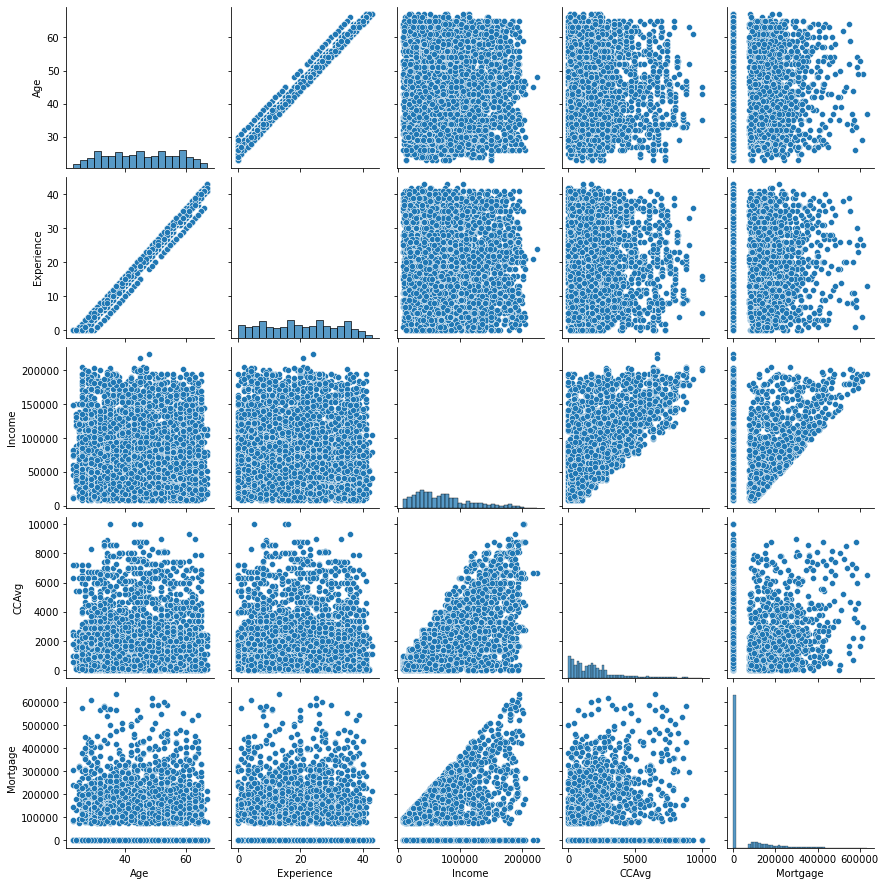

<IPython.core.display.Javascript object>

In [32]:
sns.pairplot(bank)

Off the bat, noticing that Age and Experience have a tight correlation. This makes sense since in real life those who are older have had more time to gain Experience. I'll go ahead and drop one of them.

In [33]:
bank = bank.drop(["Experience"], axis=1)

<IPython.core.display.Javascript object>

#### Some other observations:
* CCAvg and Mortgage behave interestingly, especially when either are plotted with Income
    * This could be because of real-world limitations of lenders only giving mortgages/credit limits to those who are qualified above a certain income level
    * While a significant number of customers don't have a mortgage, every customer seems to have credit card spend
* Income, CCAvg, and Mortgage are all right-skewed, hinting at the presence of some high earners/spenders that are unlike the majority of other customers

## Univariate analysis

In [34]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Observations on Region

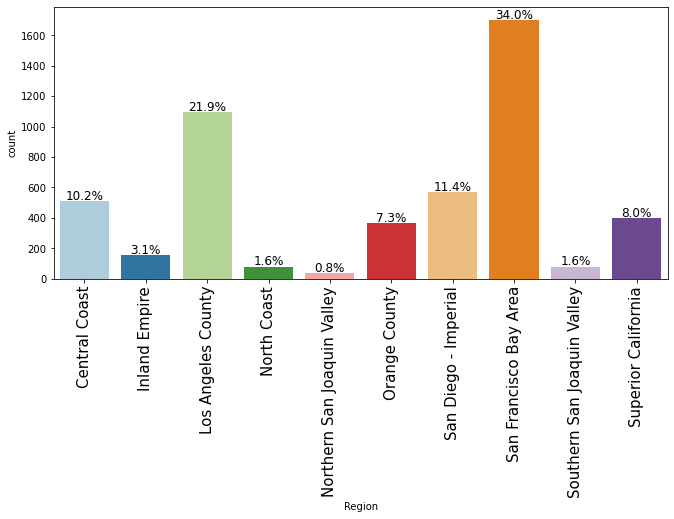

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(bank, "Region", perc=True)

* 34.0% of customers are in the San Francisco Bay Area
* 21.9% of customers are in Los Angeles County

Most customers (55.9% of total) are in these two areas.

### Observations on Family

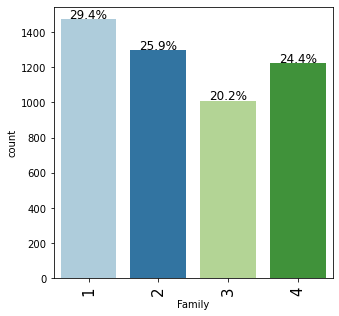

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(bank, "Family", perc=True)

* 29.4% of customers have a family size of 1 - we can interpret this as them being single

There is a good dispersion of family types within this customer dataset.

### Observations on Education

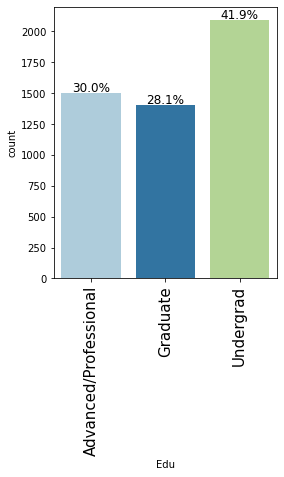

<IPython.core.display.Javascript object>

In [37]:
labeled_barplot(bank, "Edu", perc=True)

* 41.9% of customers have only completed Undergrad-level education
* An aggregate of 58.1% of customers have completed Graduate or Professional-level education

### Observations on Personal Loan

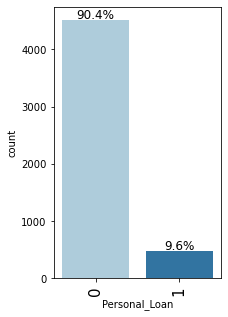

<IPython.core.display.Javascript object>

In [38]:
labeled_barplot(bank, "Personal_Loan", perc=True)

* Most customers (90.4%) did not take out a peronal loan after the previous campaign

### Observations on Securities and CD Accounts

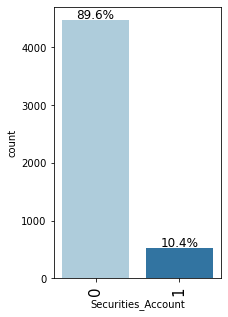

<IPython.core.display.Javascript object>

In [39]:
labeled_barplot(bank, "Securities_Account", perc=True)

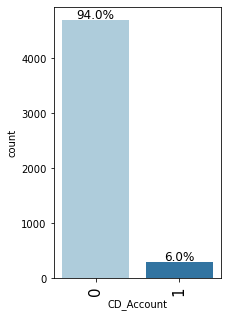

<IPython.core.display.Javascript object>

In [40]:
labeled_barplot(bank, "CD_Account", perc=True)

* Very few customers (10.4%) have a security account with the bank
* Even less customers (6.0%) have a CD account

### Observations on Online banking

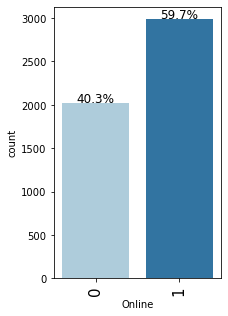

<IPython.core.display.Javascript object>

In [41]:
labeled_barplot(bank, "Online", perc=True)

* 59.7% of customers use internet banking facilities, while 40.3% do not

### Observations on Credit Card

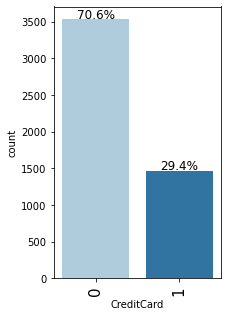

<IPython.core.display.Javascript object>

In [42]:
labeled_barplot(bank, "CreditCard", perc=True)

* Most customers (70.6%) do not use a credit card issued by another bank, and solely use All Life Bank's card(s)

### Observations on Age 

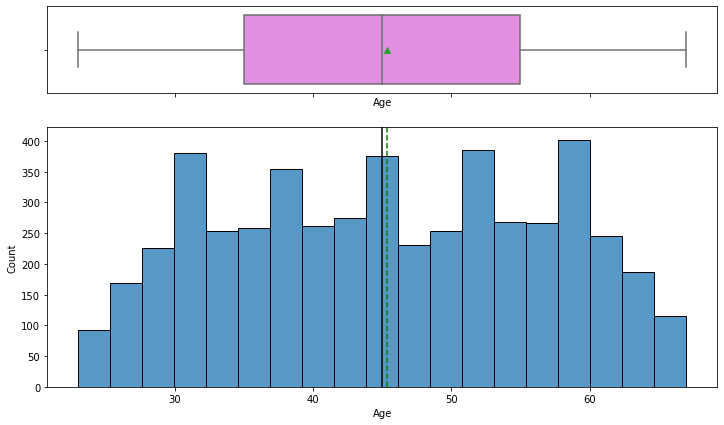

<IPython.core.display.Javascript object>

In [43]:
histogram_boxplot(bank, "Age")

* There seems to be a nice distribution of different ages amongst customers
* Mean is resting around 45 and most customers being approximately 35-55 years old

### Observations on Income 

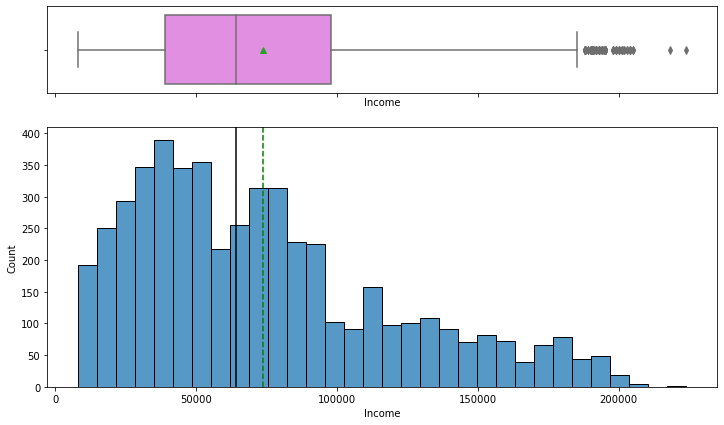

<IPython.core.display.Javascript object>

In [44]:
histogram_boxplot(bank, "Income")

Income shows a right skew, signifiying that there are some customers who make more than the majority of other customers, therefore influencing the mean. It appears that most customers make within 40k-90k USD. There are no customers with zero income, which may have to do with any prerequisites the bank has in order to become a customer.

### Observations on CCAvg 

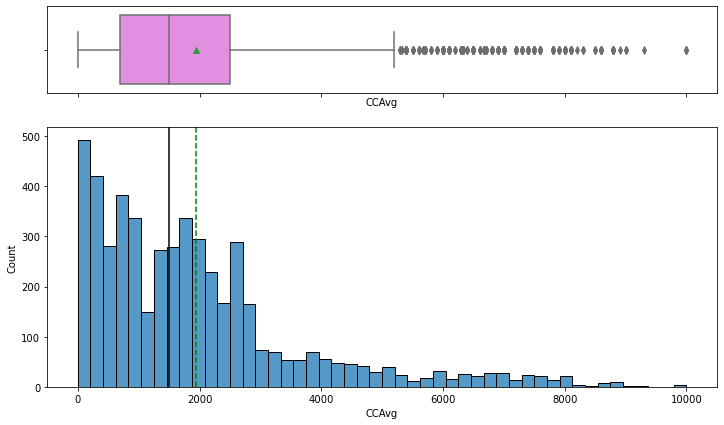

<IPython.core.display.Javascript object>

In [45]:
histogram_boxplot(bank, "CCAvg")

CCAvg shows a right skew as well, signifying that there are a good number of customers who have high monthly credit card spend. There is a considerable number of customers who do not have any CCAvg spend.

### Observations on Mortgage 

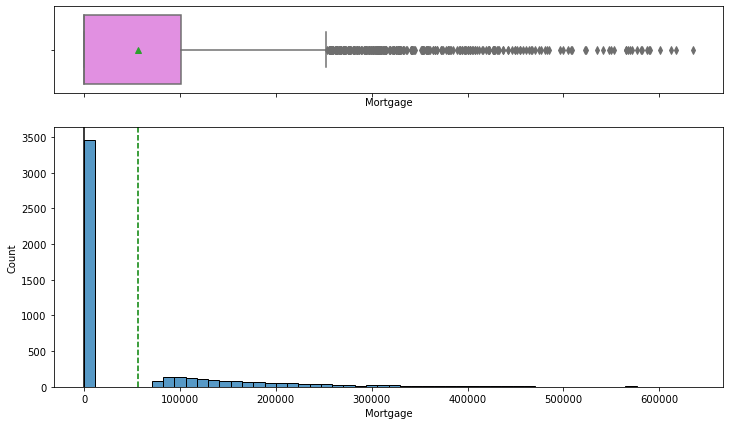

<IPython.core.display.Javascript object>

In [46]:
histogram_boxplot(bank, "Mortgage")

The Mortgage distribution is interesting - it shows a significant number of customer who do not have a mortgage (value = 0) and a wide range of customers who have mortgages valued across the board.
* In real life, this distribution makes sense since the mortgages vary depending on property and the financial circumstance of the customer.

#### Outlier Treatment

Since Income, CCAvg, and Mortgage have a considerable amount of outliers, I want to do a little bit of cleaning to ensure that the most-extreme outliers will have a minimal effect.
* The below outputs will give me entries for these three variables that are 4x away from their respective medians
* For the sake of removing these outliers, I will drop the rows from the dataset

In [47]:
# Removing excessive Income outliers
quartiles = np.quantile(bank["Income"][bank["Income"].notnull()], [0.25, 0.75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"INCOME Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")

outlier_income = bank.loc[
    np.abs(bank["Income"] - bank["Income"].median()) > power_4iqr, "Income"
]

outlier_income

bank = bank.drop(outlier_income.index, axis=0)

# Removing excessive Mortgage outliers
quartiles = np.quantile(bank["Mortgage"][bank["Mortgage"].notnull()], [0.25, 0.75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"MORTGAGE Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")

outlier_mortgage = bank.loc[
    np.abs(bank["Mortgage"] - bank["Mortgage"].median()) > power_4iqr, "Mortgage"
]

outlier_mortgage

bank = bank.drop(outlier_mortgage.index, axis=0)

# Removing excessive CCAvg outliers
quartiles = np.quantile(bank["CCAvg"][bank["CCAvg"].notnull()], [0.25, 0.75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"CCAVG Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")

outlier_CCAvg = bank.loc[
    np.abs(bank["CCAvg"] - bank["CCAvg"].median()) > power_4iqr, "CCAvg"
]

outlier_CCAvg

bank = bank.drop(outlier_CCAvg.index, axis=0)

INCOME Q1 = 39000.0, Q3 = 98000.0, 4*IQR = 236000.0
MORTGAGE Q1 = 0.0, Q3 = 101000.0, 4*IQR = 404000.0
CCAVG Q1 = 700.0, Q3 = 2500.0, 4*IQR = 7200.0


<IPython.core.display.Javascript object>

## Bivariate Analysis

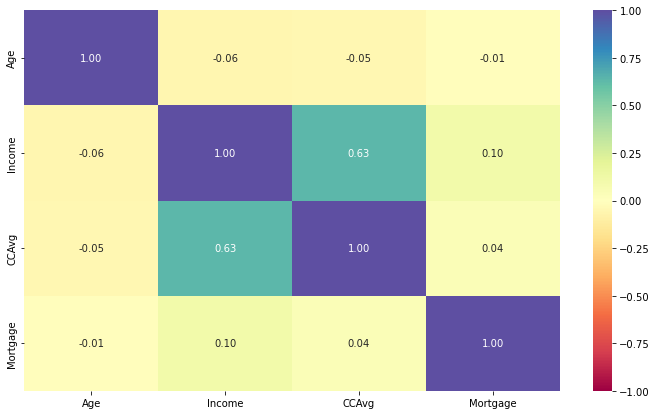

<IPython.core.display.Javascript object>

In [48]:
plt.figure(figsize=(12, 7))
sns.heatmap(bank.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Immediately noticing that Income and CCAvg are positively correlated (0.64), while other variable show weak to no correlation with each other.

Let's check out some categorical values.

In [49]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

### Observations on Personal Loan and Family size 

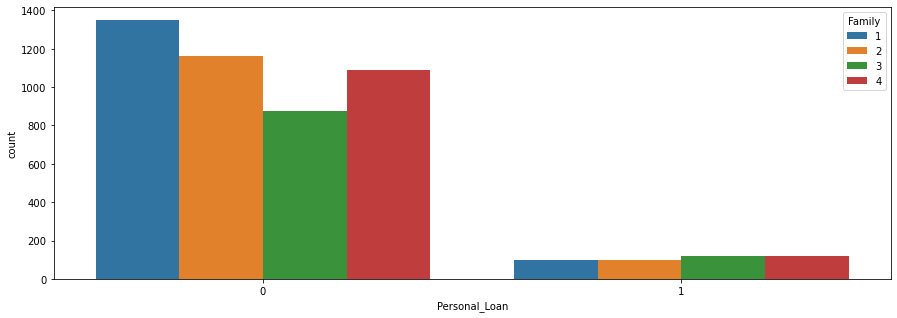

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(15, 5))
sns.countplot(bank["Personal_Loan"], hue=bank["Family"]);


This is an interesting tidbit! Out of those who accepted a personal loan offered in the last campaign, there seems to be a higher ratio of customers who have family sizes between 3-4 (vs 1-2). 

### Observations on Personal Loan and Education 

<AxesSubplot:xlabel='Personal_Loan', ylabel='count'>

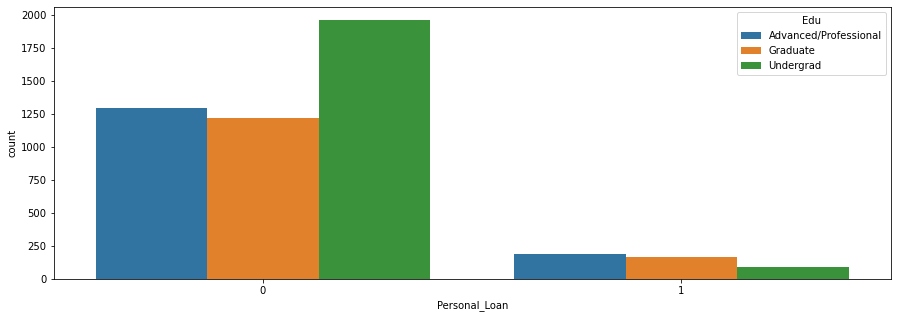

<IPython.core.display.Javascript object>

In [51]:
plt.figure(figsize=(15, 5))
sns.countplot(bank["Personal_Loan"], hue=bank["Edu"])

The majority of who accepted a loan also were of a higher education level - which, when extrapolating to the real world, could make sense given the amount of student loans those who pursue post-gradatuate education may have to shoulder.

I've checked some visualizations of Personal Loan against the other categorical values, and the distributions are identical regardless of whether the customer took a loan or not. So next, I'd like to conduct bivirate analysis with some continuous variables as well.

### Observations on Personal Loan and Income

<AxesSubplot:xlabel='Personal_Loan', ylabel='Income'>

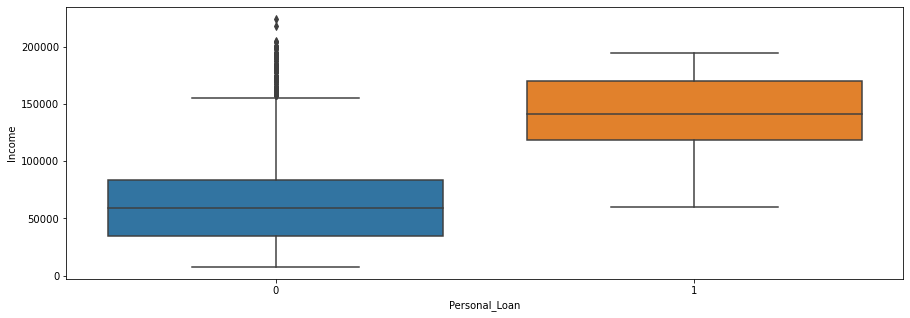

<IPython.core.display.Javascript object>

In [52]:
plt.figure(figsize=(15, 5))
sns.boxplot(bank["Personal_Loan"], bank["Income"])

Those who accepted a personal loan, tended to have a higher income (125k-275k USD) than those who did not accept a personal loan (30k-75k). This is interesting, as it implies that customers who already have a supposedly wider margin of spending power are often also receptive to loans.
  

### Observations on Personal Loan and CCAvg

<AxesSubplot:xlabel='Personal_Loan', ylabel='CCAvg'>

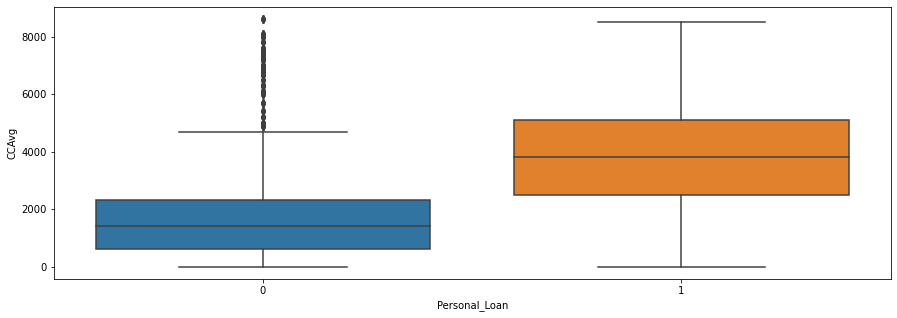

<IPython.core.display.Javascript object>

In [53]:
plt.figure(figsize=(15, 5))
sns.boxplot(bank["Personal_Loan"], bank["CCAvg"])

Customers who have higher Credit Card spend per month (~2500-5500 USD) are more willing to accept private loans, whereas those customers who churn through less spend on their cards are less open.

Of course, there are a slew of outliers, noticeably high spenders who also did not take a loan.

### Observations on Personal Loan and Mortgage

<AxesSubplot:xlabel='Personal_Loan', ylabel='Mortgage'>

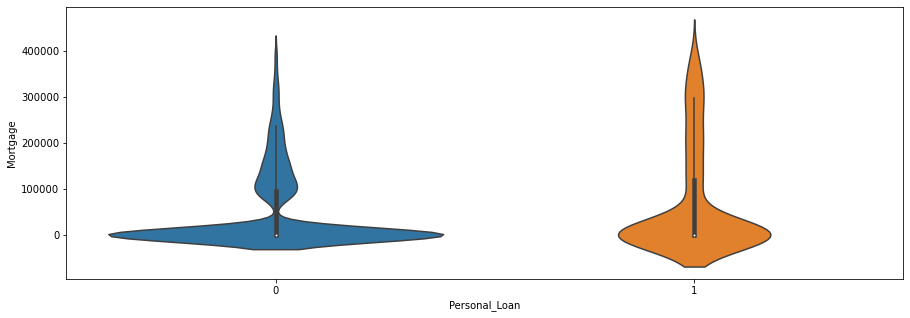

<IPython.core.display.Javascript object>

In [54]:
plt.figure(figsize=(15, 5))
sns.violinplot(x="Personal_Loan", y="Mortgage", data=bank)

Customers who took out a personal loan reportedly also had a slightly higher range of mortgages than customers who did not take out a loan.
* Borrowers:
    * May have mortgages that are higher in value, with the distribution depicting a substantial spread until around 35k USD
    * While some customers do not have mortgages (value = 0), overall, customers may have some type of mortgage at varying amounts

* Non-Borrowers:
    * Have a higher occurance of not having a mortgage at all (value = 0)
    * If they do carry a mortgage, it is often within the range of 7k-20k USD as depicted by the distribution

#### Key Overall Observations:
* Income and CCAvg appear to be relatively strong indicators of a customer's chance of accepting a personal loan.
* Mortgage, Education and Family may also play a role.
* Other factors appear to be not very good indicators.

#### Additional observations from looking at Incomes across other categorical values:
* Those who have undergraduate degrees make a wider and higher range of income than their more educated counterparts
    * This may be due to being in the workforce for longer than those who spent more time in school
* When looking at geographic regions, customers who have home addresses in Orange County and Los Angeles Country have a slightly higher range of incomes
    * However, this may not be a good indicator of Income since the distribution are similar across the regions with the exception of perhaps the North Coast and Northern San Joaquin Valley

<AxesSubplot:xlabel='Edu', ylabel='Income'>

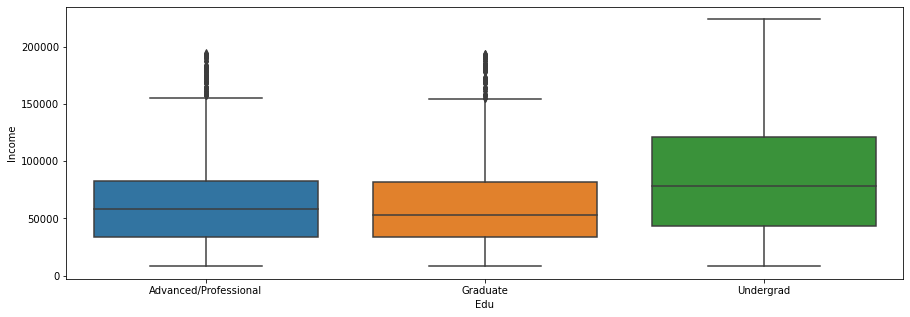

<IPython.core.display.Javascript object>

In [55]:
plt.figure(figsize=(15, 5))
sns.boxplot(bank["Edu"], bank["Income"])

<AxesSubplot:xlabel='Region', ylabel='Income'>

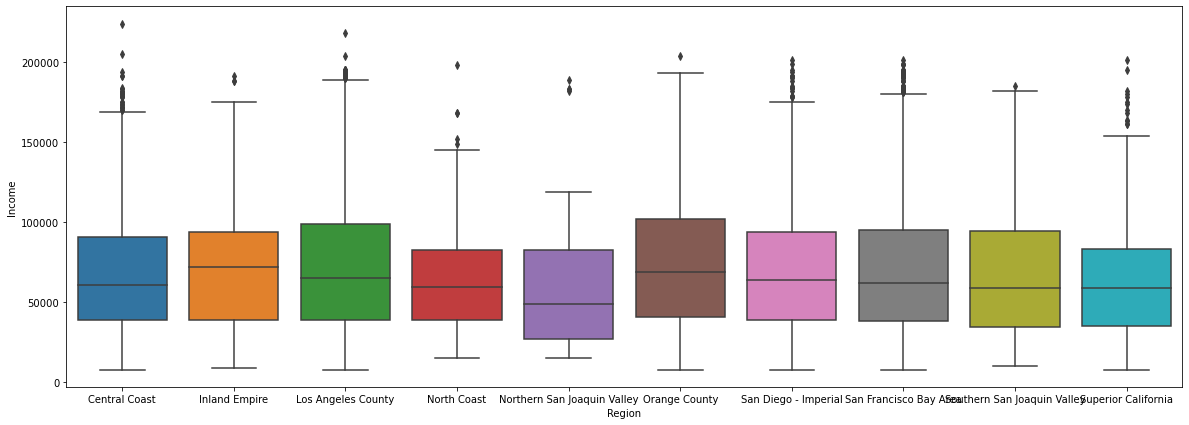

<IPython.core.display.Javascript object>

In [56]:
plt.figure(figsize=(20, 7))
sns.boxplot(bank["Region"], bank["Income"])

## Model Building
The next section will be covering the following steps:

1. Data preparation
2. Partition the data into train and test set.
3. Built a CART model on the train data.
4. Tune the model and prune the tree, if required.

### Splitting the dataset

In [57]:
X = bank.drop(["Personal_Loan"], axis=1)
y = bank["Personal_Loan"]

<IPython.core.display.Javascript object>

In [58]:
# this is encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

,Age,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,Edu_Graduate,Edu_Undergrad,Region_Inland Empire,Region_Los Angeles County,Region_North Coast,Region_Northern San Joaquin Valley,Region_Orange County,Region_San Diego - Imperial,Region_San Francisco Bay Area,Region_Southern San Joaquin Valley,Region_Superior California
0,25,49000,1600.0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,45,34000,1500.0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,39,11000,1000.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,35,100000,2700.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,35,45000,1000.0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

<IPython.core.display.Javascript object>

In [60]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 2949
Number of rows in test data = 1967


<IPython.core.display.Javascript object>

In [61]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.917938
1    0.082062
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900864
1    0.099136
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

### Deciding on Evaluation Criterion

This Model could make a wrong prediction in a couple of ways:
 
1. Predicting a customer will take a personal loan (Borrower) but in reality the customer would decline the loan.
2. Predicting a customer will decline the personal loan (Non-Borrower) but in reality the customer accepts.

#### In this scenario, which case is more important? 

* Having a customer labelled as a Borrower NOT end up taking the loan would represent a loss of opportunity and marketing efforts on the bank's part.

#### How do we reduce this loss, and reduce False Positives?
*  `Precision` should be maximized, the greater the precision higher the chances of minimizing the false negatives.

In [62]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [63]:
##  Function to calculate recall score
def get_precision_score(model):
    """
    model : classifier to predict values of X

    """
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Precision on training set : ", metrics.precision_score(y_train, pred_train))
    print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

<IPython.core.display.Javascript object>

### Building the Decision Tree Model

Building our model using the DecisionTreeClassifier function, and using default 'gini' criteria to split. 

In [64]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training and test set

In [65]:
# Accuracy on train and test
print("Accuracy on training set : ", model.score(X_train, y_train))
print("Accuracy on test set : ", model.score(X_test, y_test))
# Precision on train and test
get_precision_score(model)

Accuracy on training set :  1.0
Accuracy on test set :  0.9771225216065074
Precision on training set :  1.0
Precision on test set :  0.907608695652174


<IPython.core.display.Javascript object>

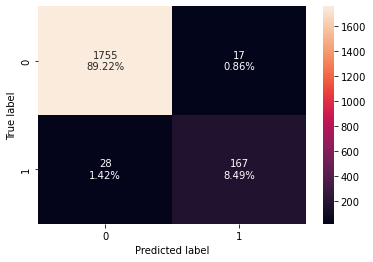

<IPython.core.display.Javascript object>

In [66]:
confusion_matrix_sklearn(model, X_test, y_test)

The performance of the training set signals that the model is probably overfitting.

### Visualizing the Decision Tree

In [67]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Income', 'CCAvg', 'Mortgage', 'Family_2', 'Family_3', 'Family_4', 'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1', 'Edu_Graduate', 'Edu_Undergrad', 'Region_Inland Empire', 'Region_Los Angeles County', 'Region_North Coast', 'Region_Northern San Joaquin Valley', 'Region_Orange County', 'Region_San Diego - Imperial', 'Region_San Francisco Bay Area', 'Region_Southern San Joaquin Valley', 'Region_Superior California']


<IPython.core.display.Javascript object>

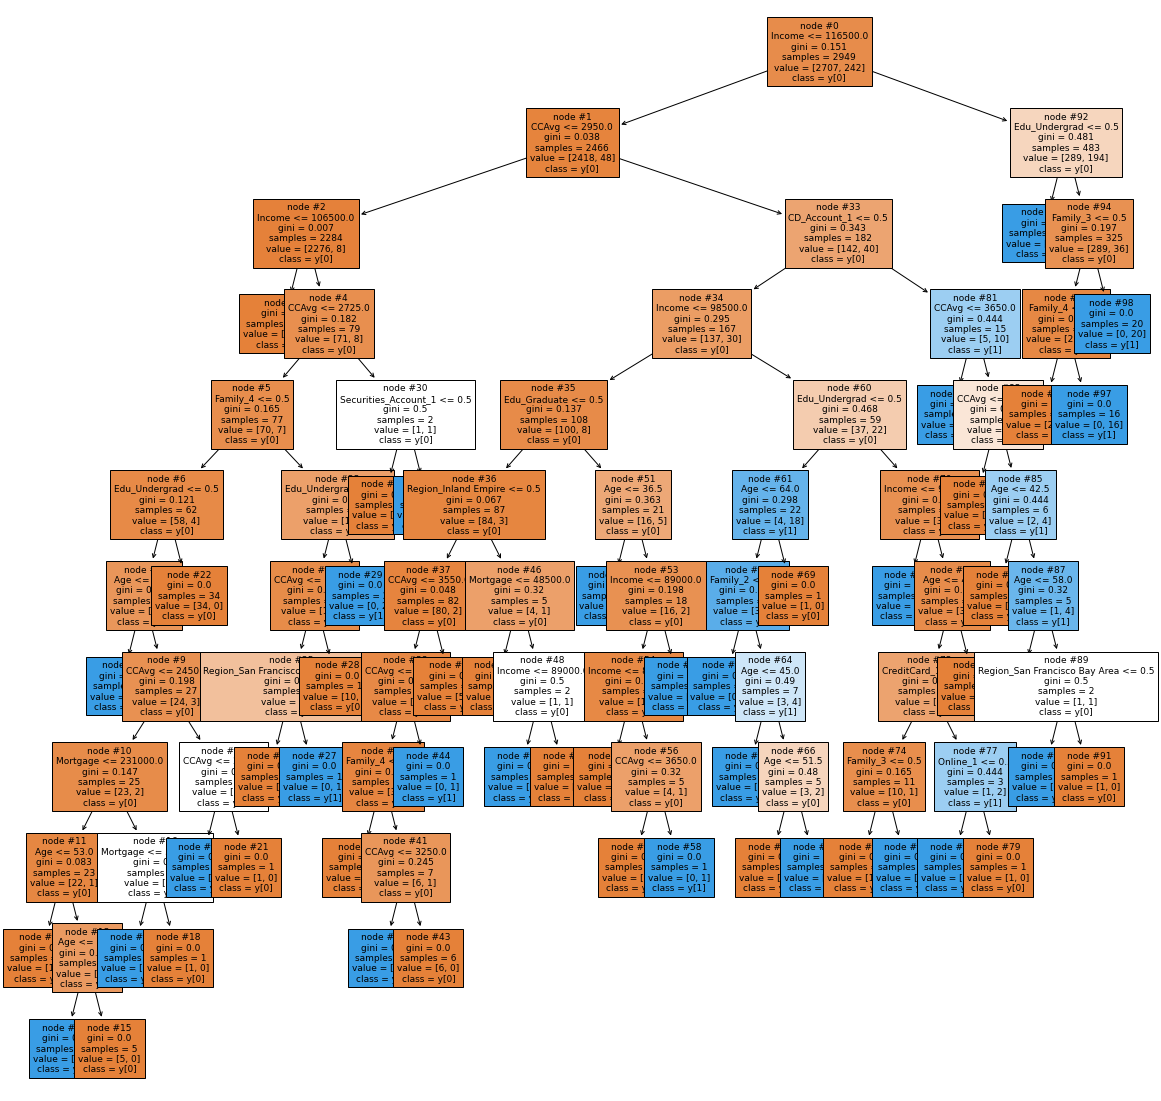

<IPython.core.display.Javascript object>

In [68]:
plt.figure(figsize=(20, 20))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [69]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116500.00
|   |--- CCAvg <= 2950.00
|   |   |--- Income <= 106500.00
|   |   |   |--- weights: [2205.00, 0.00] class: 0
|   |   |--- Income >  106500.00
|   |   |   |--- CCAvg <= 2725.00
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- Edu_Undergrad <= 0.50
|   |   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |   |--- CCAvg <= 2450.00
|   |   |   |   |   |   |   |   |--- Mortgage <= 231000.00
|   |   |   |   |   |   |   |   |   |--- Age <= 53.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [17.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- Age >  53.00
|   |   |   |   |   |   |   |   |   |   |--- Age <= 55.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |   |   |   |--- Age >  55.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [5.00, 0.00] clas

<IPython.core.display.Javascript object>

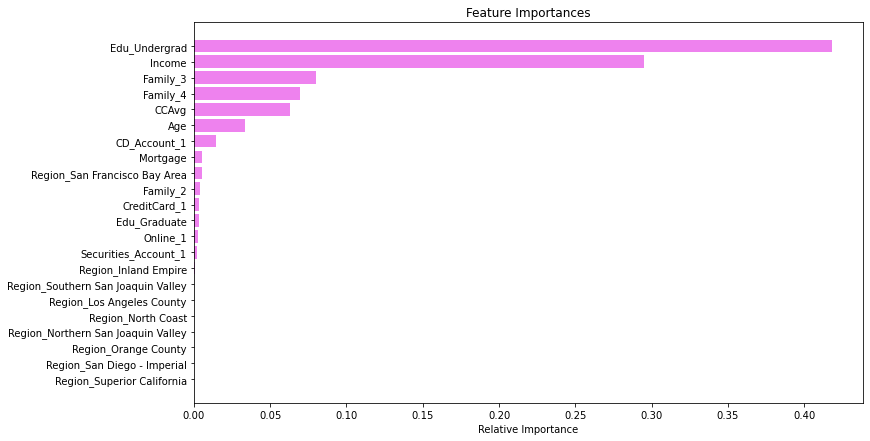

<IPython.core.display.Javascript object>

In [70]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 7))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Based on these results, whether the customer has Undergraduate-level Education, a family size of 3, and their Income are the most important variables.

### Iteration 2: Reducing over fitting by limiting depth

In [71]:
model2 = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=1)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

<IPython.core.display.Javascript object>

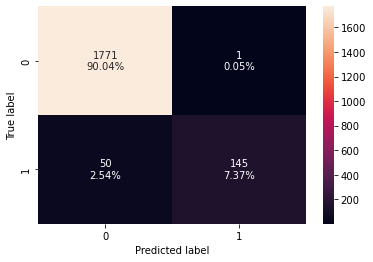

<IPython.core.display.Javascript object>

In [72]:
confusion_matrix_sklearn(model2, X_test, y_test)

In [73]:
# Accuracy on train and test
print("Accuracy on training set : ", model2.score(X_train, y_train))
print("Accuracy on test set : ", model2.score(X_test, y_test))
# Precision on train and test
get_precision_score(model2)

Accuracy on training set :  0.9799932180400136
Accuracy on test set :  0.9740721911540416
Precision on training set :  0.9740932642487047
Precision on test set :  0.9931506849315068


<IPython.core.display.Javascript object>

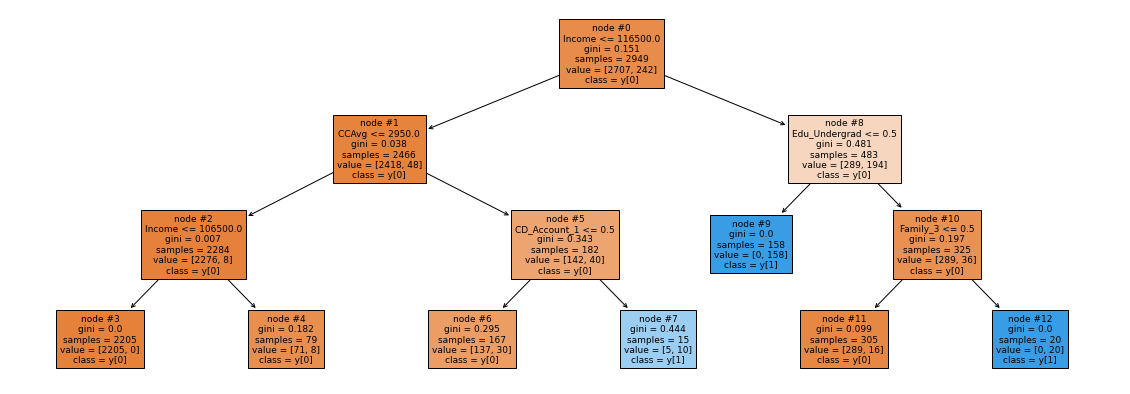

<IPython.core.display.Javascript object>

In [74]:
plt.figure(figsize=(20, 7))

out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

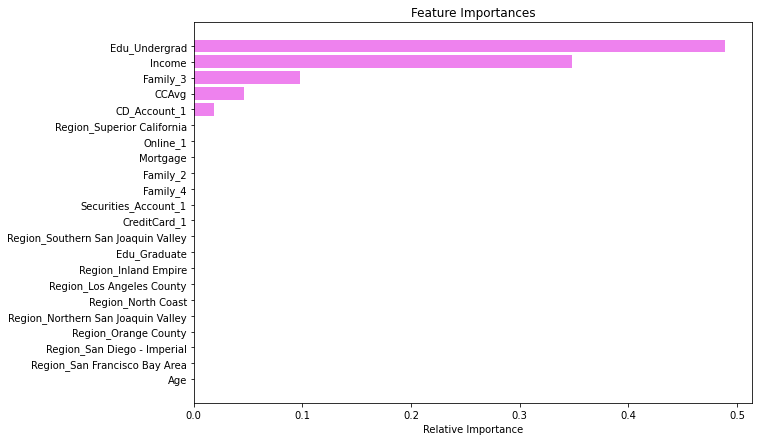

<IPython.core.display.Javascript object>

In [75]:
importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 7))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Recall on training set has reduced from 1 to 0.97 but this is a slight improvement from overfitting, although it probably still is to a degree. Nevertheless, it is still a relatively more generalized model.

### Iteration 3: Using GridSearch for Hyperparameter tuning of our tree model 


In [76]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1, 10),
    "min_samples_leaf": [1, 2, 5, 7, 10, 15, 20],
    "max_leaf_nodes": [2, 3, 5, 10],
    "min_impurity_decrease": [0.001, 0.01, 0.1],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, min_samples_leaf=5,
                       random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training and test set

In [77]:
# Accuracy on train and test
print("Accuracy on training set : ", estimator.score(X_train, y_train))
print("Accuracy on test set : ", estimator.score(X_test, y_test))
# Precision on train and test
get_precision_score(estimator)

Accuracy on training set :  0.9874533740250933
Accuracy on test set :  0.9771225216065074
Precision on training set :  0.9149797570850202
Precision on test set :  0.9032258064516129


<IPython.core.display.Javascript object>

Performance looks better on the training set as compared to the initial model, but not as high precision as Iteration 2 (limiting depth). After turning the hyperparameters with Grid Search the model has become simpler (max depth is now 4) while performance remains robust.

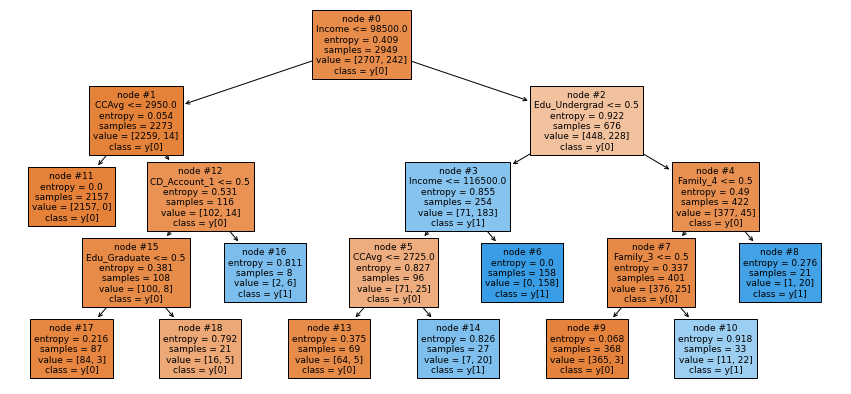

<IPython.core.display.Javascript object>

In [78]:
plt.figure(figsize=(15, 7))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

Compared to the initial tree, we are getting a more simplified tree after pre-pruning.

### Iteration 4: Cost Complexity Pruning

For every possible sub-tree, this method calculates the alpha value to determine whether to remove or not, and then pruning the sub-trees which are not as ‘valuable’. The main caveat being: when we delete a sub-tree, we increase error - the model will be more error prone since we are taking something away.

In [79]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [80]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000271,0.000543
2,0.000271,0.001085
3,0.000284,0.002507
4,0.000301,0.004316
5,0.000313,0.004942
6,0.000319,0.005580
7,0.000339,0.005919
8,0.000362,0.006281
9,0.000365,0.007010


<IPython.core.display.Javascript object>

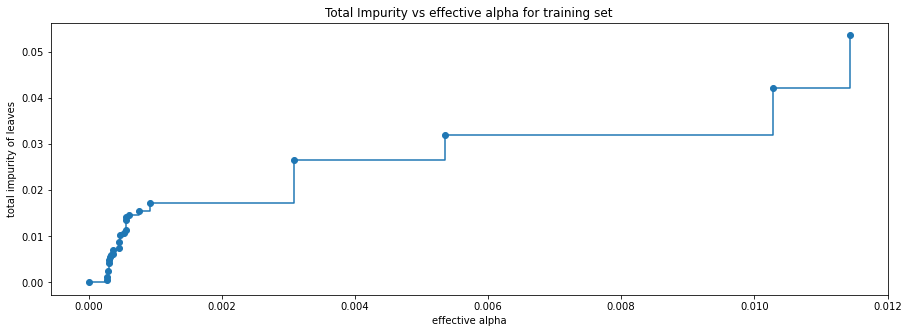

<IPython.core.display.Javascript object>

In [81]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [82]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04851239865878376


<IPython.core.display.Javascript object>


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

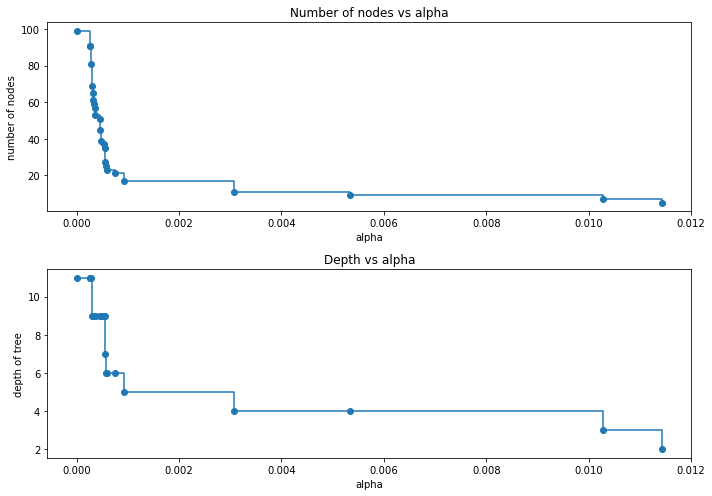

<IPython.core.display.Javascript object>

In [83]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Looking at our evaluation metric, precision

In [84]:
precision_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = precision_score(y_train, pred_train)
    precision_train.append(values_train)

<IPython.core.display.Javascript object>

In [85]:
precision_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = precision_score(y_test, pred_test)
    precision_test.append(values_test)

<IPython.core.display.Javascript object>

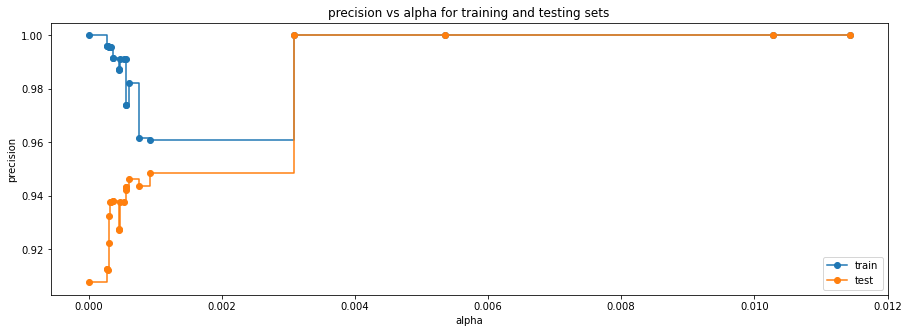

<IPython.core.display.Javascript object>

In [86]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("precision")
ax.set_title("precision vs alpha for training and testing sets")
ax.plot(ccp_alphas, precision_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, precision_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [87]:
# creating the model where we get highest train and test precision
index_best_model = np.argmax(precision_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0030807631124122586, random_state=1)


<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [88]:
# Accuracy on train and test
print("Accuracy on training set : ", best_model.score(X_train, y_train))
print("Accuracy on test set : ", best_model.score(X_test, y_test))
# precision on train and test
get_precision_score(best_model)

Accuracy on training set :  0.9837232960325534
Accuracy on test set :  0.9740721911540416
Precision on training set :  1.0
Precision on test set :  1.0


<IPython.core.display.Javascript object>

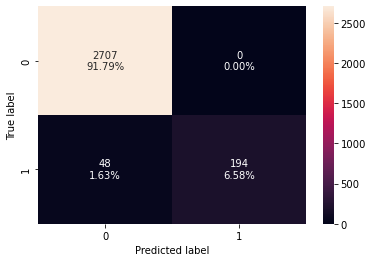

<IPython.core.display.Javascript object>

In [89]:
confusion_matrix_sklearn(best_model, X_train, y_train)

With post-pruning, precision has shot up to result in 1st for both the training and test set, signaling that the model is overfitting - this may not be our solution. As seen below, although our model is now simplified, it may be TOO simplified.

#### Visualizing the Decision Tree

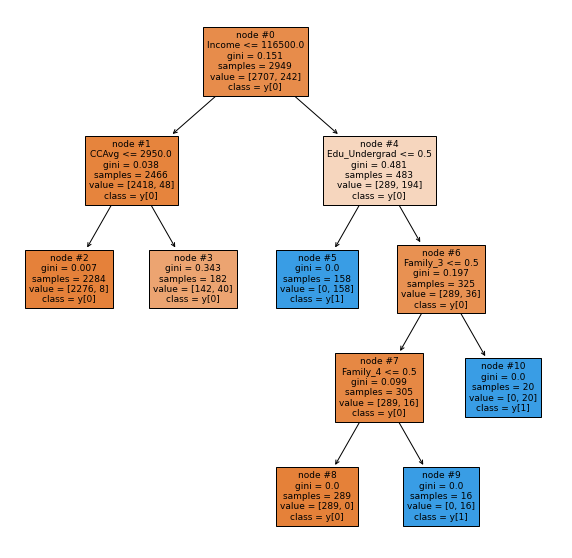

<IPython.core.display.Javascript object>

In [90]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

## Comparing all the decision tree models

### Initial Model

In [91]:
# Accuracy on train and test
print("Accuracy on training set : ", model.score(X_train, y_train))
print("Accuracy on test set : ", model.score(X_test, y_test))
# Recall on train and test
get_precision_score(model)

Accuracy on training set :  1.0
Accuracy on test set :  0.9771225216065074
Precision on training set :  1.0
Precision on test set :  0.907608695652174


<IPython.core.display.Javascript object>

### Iteration 2: Limiting depth

In [92]:
# Accuracy on train and test
print("Accuracy on training set : ", model2.score(X_train, y_train))
print("Accuracy on test set : ", model2.score(X_test, y_test))
# precision on train and test
get_precision_score(model2)

Accuracy on training set :  0.9799932180400136
Accuracy on test set :  0.9740721911540416
Precision on training set :  0.9740932642487047
Precision on test set :  0.9931506849315068


<IPython.core.display.Javascript object>

### Iteration 3: Grid Search

In [93]:
# Accuracy on train and test
print("Accuracy on training set : ", estimator.score(X_train, y_train))
print("Accuracy on test set : ", estimator.score(X_test, y_test))
# precision on train and test
get_precision_score(estimator)

Accuracy on training set :  0.9874533740250933
Accuracy on test set :  0.9771225216065074
Precision on training set :  0.9149797570850202
Precision on test set :  0.9032258064516129


<IPython.core.display.Javascript object>

### Iteration 4: Post-Pruning

In [94]:
# Accuracy on train and test
print("Accuracy on training set : ", best_model.score(X_train, y_train))
print("Accuracy on test set : ", best_model.score(X_test, y_test))
# precision on train and test
get_precision_score(best_model)

Accuracy on training set :  0.9837232960325534
Accuracy on test set :  0.9740721911540416
Precision on training set :  1.0
Precision on test set :  1.0


<IPython.core.display.Javascript object>

#### Decision tree with pre-pruning (limiting depth) is giving the highest precision on the test set.
    
## Business Insights

* Education, Family size, and Income are the most important variables in determining if a customer in the dataset will purchase a loan


* Customers who have Undergraduate-level education, have a family size of 3, and have an income within the range of 125k-275k USD per year should be the bank's target customers
    * There is a positive correlation between Income and CCAvg, meaning that those who are higher earners are also proportionally higher spenders
    * They may be more comfortable with borrowing money since their higher income may ensure that they pay it back without difficulty
    * A family size of 3 may imply the prescence of a child, whose expenses may often exceed that of a single person


* The bank's marketing campaign should focus on the aforementioned variables and target customer profile within their efforts, perhaps gearing their assets and placements towards middle-upper class families